# filters
edge detection 
-sobel

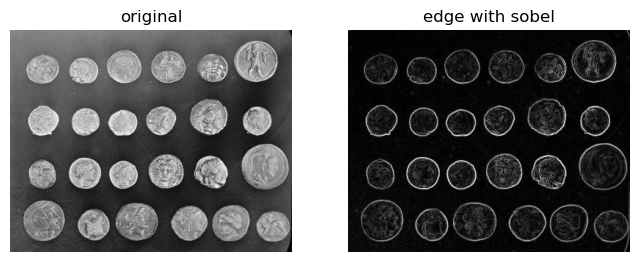

In [8]:
#import 
from skimage.filters import sobel
from skimage import data
import matplotlib.pyplot as plt
#apply edge detection filter 
image_coins = data.coins()
edge_sobel = sobel(image_coins)
#show
def plot_comparison(original , filtered , title_filtered):
    fig ,(ax1 ,ax2) = plt.subplots(ncols=2,  figsize=(8,9), sharex =True, sharey=True)
    ax1.imshow(original,cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered , cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
plot_comparison(image_coins , edge_sobel , "edge with sobel")

# gaussian smoothing


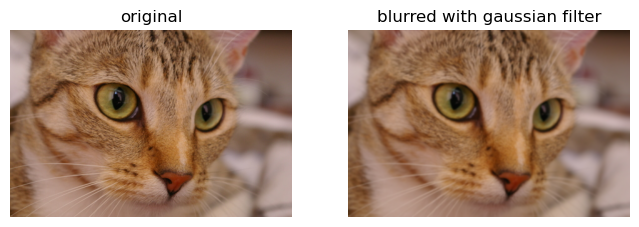

In [25]:
from skimage.filters import gaussian
from skimage import data
image_dogs = data.chelsea()

guassian_image = gaussian(image_dogs, sigma =1 , channel_axis=-1)

plot_comparison(image_dogs , guassian_image ,"blurred with gaussian filter")

# contrast enhancement
 -medical image

## enhance contrast
-contrast stretching
-histogram equalization --> 3 types:

1.histogram equalization
2.adaptive
3.contrast limited adaptive

### histogram equalization





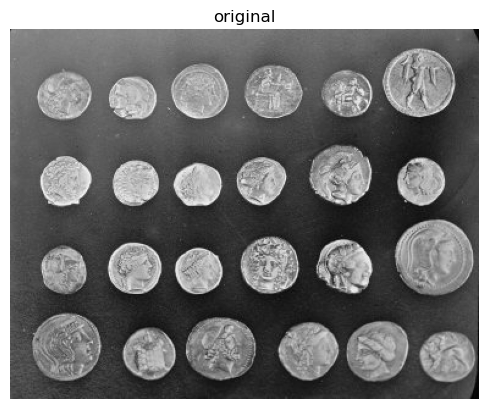

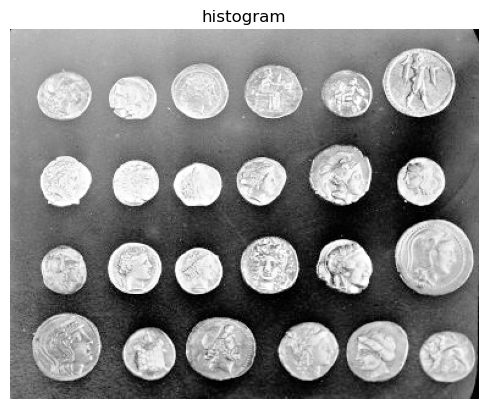

In [30]:
from skimage import exposure
from skimage import data
import matplotlib.pyplot as plt

image_coins = data.coins()

image_eq =exposure.equalize_hist(image_coins)
def  show_image(image , title):
    plt.imshow(image,cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(image_coins , 'original')
show_image(image_eq , 'histogram')

### adaptive equalization

we use CLAHE in scikit_image


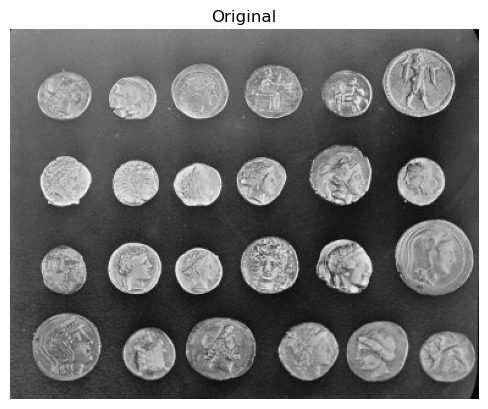

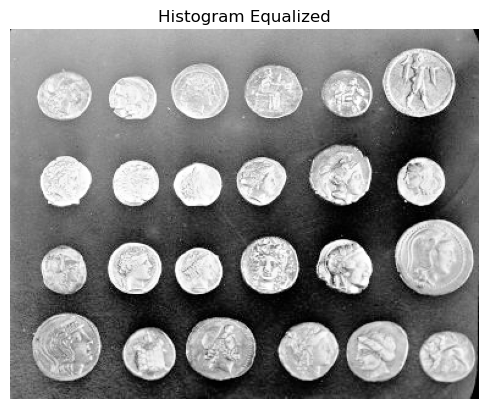

In [33]:
from skimage import exposure

image_adapteq= exposure.equalize_adapthist(image_coins ,clip_limit=0.03)

def show_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show the original and equalized images
show_image(image_coins, 'Original')
show_image(image_eq, 'Histogram Equalized')



# transformation
-preparing for classification ml models
-optimization and compression 
-save images with some proportion

### rotating clockwise

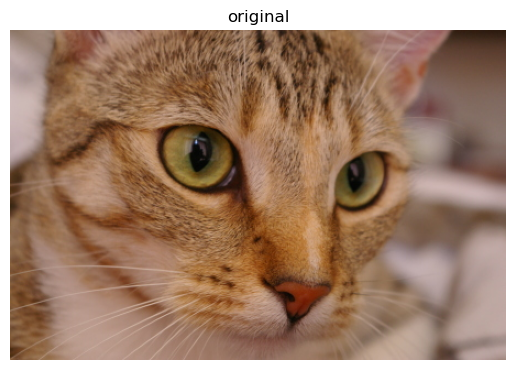

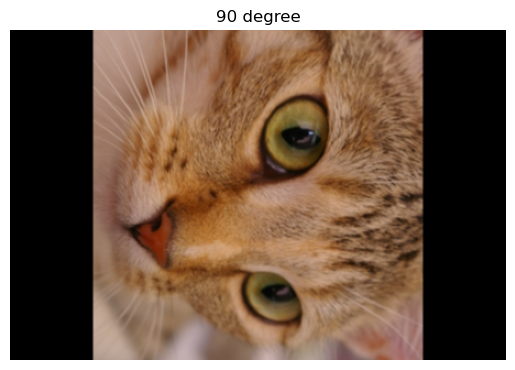

In [36]:
from skimage.transform import rotate

image_rotated = rotate(image_dogs, -90) #90 for anticlockwise

show_image(image_dogs , 'original')
show_image(image_rotated,"90 degree")

### rescaling
downgrading

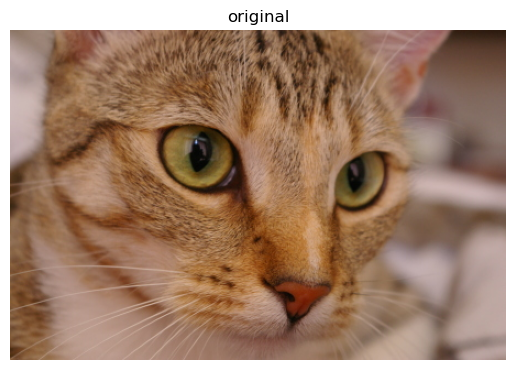

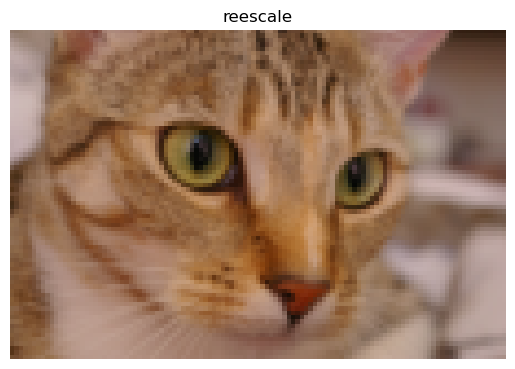

In [42]:
from skimage.transform import rescale

image_rescaled = rescale(image_dogs, 1/4 , anti_aliasing = True , channel_axis=-1)
show_image(image_dogs , 'original')
show_image(image_rescaled,"reescale")


### resizing

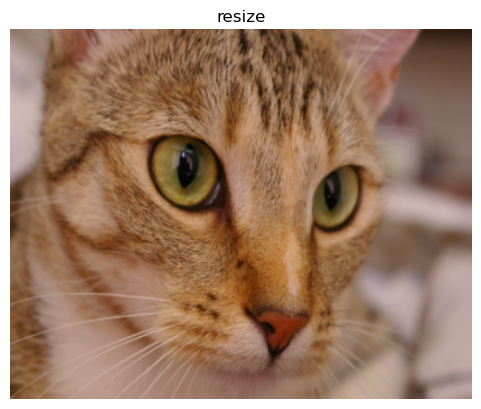

In [46]:
from skimage.transform import resize
height = 400
width = 500

image_resized = resize(image_dogs , (height , width), anti_aliasing=True)
show_image(image_resized,"resize")

### resizing prportionally 

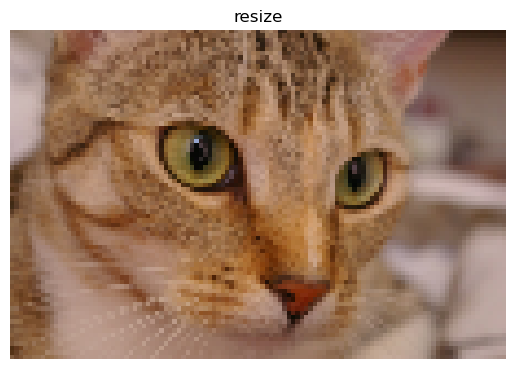

In [50]:
from skimage.transform import resize

height = image_dogs.shape[0] / 4
width = image_dogs.shape[1] / 4

image_resized = resize(image_dogs , (height, width) , anti_aliasing=False)
show_image(image_resized,"resize")


# morphology

-better for binary images
-can extend for grayscale

operations:
-dilation
-erosion

In [51]:
#shapes in scikit-image
from skimage import morphology

square = morphology.square(4)


In [52]:
rectangle = morphology.rectangle(4,2)

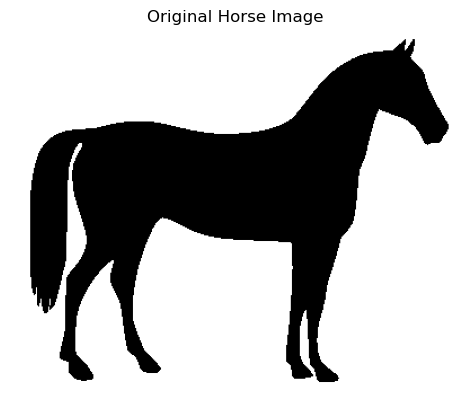

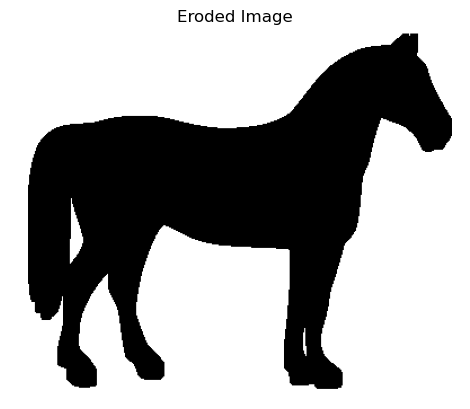

In [59]:
#erosion 
from skimage import morphology , data
from skimage.morphology import rectangle
import matplotlib.pyplot as plt
image_horse = data.horse()
#set structering element to the rectangular-shape
selem = rectangle(12,6)

#obtain the erosed image with binary 
eroded_image = morphology.binary_erosion(image_horse , footprint=selem)

def show_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show the original and eroded images
show_image(image_horse, 'Original Horse Image')
show_image(eroded_image, 'Eroded Image')

### dilation in scikit-image

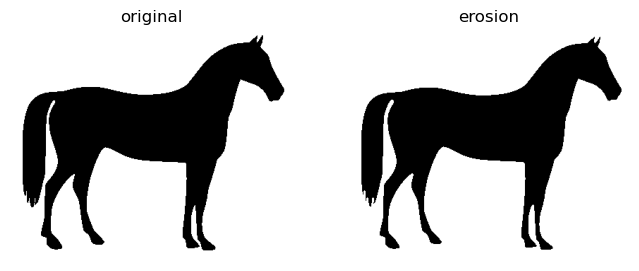

In [61]:
#obtain dilated image , using binary dilation

dilated_image = morphology.binary_dilation(image_horse)
plot_comparison(image_horse , dilated_image , 'erosion')